---

## Imports

In [1]:
import pandas as pd
import numpy as np

import wget, os
import time
import glob

import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline
sns.set_style('whitegrid')

---

## Day-Ahead-Market DataFrame

In [124]:
dam_orig_cols=['INTERVALSTARTTIME_GMT',
               'OPR_DT',
               'OPR_HR',
               'NODE',
               'MARKET_RUN_ID',
               'LMP_TYPE',
               'MW']

dam_new_cols =['start_datetime',
               'date',
               'hr_index',
               'node',
               'market',
               'lmp_type',
               'dam_price_per_mwh']

dam_rename_dict = {old: new for old, new in zip(dam_orig_cols, dam_new_cols)}

In [125]:
caiso_dam_df = pd.DataFrame(columns=dam_new_cols)

for file in glob.glob('../raw_data/unzipped_caiso/unzipped_caiso_dam/*.csv'):
    df = pd.read_csv(file, usecols=dam_orig_cols).rename(index=str,
                                                         columns=dam_rename_dict)
    df = df[df.lmp_type == 'LMP']
    caiso_dam_df = caiso_dam_df.append(df, ignore_index=True)

In [126]:
caiso_dam_df.shape

(24, 7)

In [127]:
caiso_dam_df = caiso_dam_df.sort_values(by='start_datetime').reset_index(drop=True)

caiso_dam_df['start_datetime'] = pd.to_datetime(caiso_dam_df['start_datetime'])

caiso_dam_df.set_index('start_datetime', inplace=True)
caiso_dam_df.sort_index(inplace=True)
caiso_dam_df.head()

,date,hr_index,node,market,lmp_type,dam_price_per_mwh
start_datetime,,,,,,
2022-06-16 07:00:00+00:00,2022-06-16,1,0096WD_7_N001,DAM,LMP,71.31581
2022-06-16 08:00:00+00:00,2022-06-16,2,0096WD_7_N001,DAM,LMP,68.47734
2022-06-16 09:00:00+00:00,2022-06-16,3,0096WD_7_N001,DAM,LMP,66.35294
2022-06-16 10:00:00+00:00,2022-06-16,4,0096WD_7_N001,DAM,LMP,67.38432
2022-06-16 11:00:00+00:00,2022-06-16,5,0096WD_7_N001,DAM,LMP,70.51006


In [128]:
caiso_dam_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24 entries, 2022-06-16 07:00:00+00:00 to 2022-06-17 06:00:00+00:00
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               24 non-null     object 
 1   hr_index           24 non-null     object 
 2   node               24 non-null     object 
 3   market             24 non-null     object 
 4   lmp_type           24 non-null     object 
 5   dam_price_per_mwh  24 non-null     float64
dtypes: float64(1), object(5)
memory usage: 1.3+ KB


---

## Hour-Ahead-Scheduling Process DataFrame
(hour-ahead, 15-minute realtime market)

In [129]:
hasp_orig_cols=['INTERVALSTARTTIME_GMT',
                'OPR_DT',
                'OPR_HR',
                'NODE',
                'MARKET_RUN_ID',
                'LMP_TYPE',
                'MW']

hasp_new_cols =['start_datetime',
                'date',
                'hr_index',
                'node',
                'market',
                'lmp_type',
                'hasp_price_per_mwh']

hasp_rename_dict = {old: new for old, new in zip(hasp_orig_cols, hasp_new_cols)}

In [130]:
caiso_hasp_df = pd.DataFrame(columns=hasp_new_cols)

for file in glob.glob('../raw_data/unzipped_caiso/unzipped_caiso_hasp/*.csv'):
    df = pd.read_csv(file, usecols=hasp_orig_cols).rename(index=str,
                                                          columns=hasp_rename_dict)
    df = df[df.lmp_type == 'LMP']
    caiso_hasp_df = caiso_hasp_df.append(df, ignore_index=True)

In [131]:
caiso_hasp_df.shape

(23164, 7)

In [132]:
caiso_hasp_df = caiso_hasp_df.sort_values(by='start_datetime').reset_index(drop=True)

caiso_hasp_df['start_datetime'] = pd.to_datetime(caiso_hasp_df['start_datetime'])

caiso_hasp_df.set_index('start_datetime', inplace=True)
caiso_hasp_df.sort_index(inplace=True)
caiso_hasp_df.head()

,date,hr_index,node,market,lmp_type,hasp_price_per_mwh
start_datetime,,,,,,
2019-03-04 08:00:00+00:00,2019-03-04,1,0096WD_7_N001,HASP,LMP,51.04837
2019-03-04 08:15:00+00:00,2019-03-04,1,0096WD_7_N001,HASP,LMP,49.55352
2019-03-04 08:30:00+00:00,2019-03-04,1,0096WD_7_N001,HASP,LMP,45.65972
2019-03-04 08:45:00+00:00,2019-03-04,1,0096WD_7_N001,HASP,LMP,45.22536
2019-03-04 09:00:00+00:00,2019-03-04,2,0096WD_7_N001,HASP,LMP,43.87333


In [133]:
caiso_hasp_df = caiso_hasp_df.resample('H').mean()

In [134]:
caiso_hasp_df.head()

,hasp_price_per_mwh
start_datetime,
2019-03-04 08:00:00+00:00,47.871742
2019-03-04 09:00:00+00:00,42.968495
2019-03-04 10:00:00+00:00,43.012053
2019-03-04 11:00:00+00:00,42.522818
2019-03-04 12:00:00+00:00,47.248450


In [135]:
caiso_hasp_df.shape

(5807, 1)

---

## RTM DataFrame
(realtime spot prices, 5-minute realtime settlements only)

In [136]:
rtm_orig_cols=['INTERVALSTARTTIME_GMT',
                'OPR_DT',
                'OPR_HR',
                'NODE',
                'MARKET_RUN_ID',
                'LMP_TYPE',
                'VALUE']

rtm_new_cols =['start_datetime',
                'date',
                'hr_index',
                'node',
                'market',
                'lmp_type',
                'rtm_price_per_mwh']

rtm_rename_dict = {old: new for old, new in zip(rtm_orig_cols, rtm_new_cols)}

In [137]:
caiso_rtm_df = pd.DataFrame(columns=rtm_new_cols)

for file in glob.glob('../raw_data/unzipped_caiso/unzipped_caiso_rtm/*.csv'):
    df = pd.read_csv(file, usecols=rtm_orig_cols).rename(index=str,
                                                          columns=rtm_rename_dict)
    df = df[df.lmp_type == 'LMP']
    caiso_rtm_df = caiso_rtm_df.append(df, ignore_index=True)

In [138]:
caiso_rtm_df.shape

(78516, 7)

In [139]:
caiso_rtm_df = caiso_rtm_df.sort_values(by='start_datetime').reset_index(drop=True)

caiso_rtm_df['start_datetime'] = pd.to_datetime(caiso_rtm_df['start_datetime'])

caiso_rtm_df.set_index('start_datetime', inplace=True)
caiso_rtm_df.sort_index(inplace=True)
caiso_rtm_df.head()

,date,hr_index,node,market,lmp_type,rtm_price_per_mwh
start_datetime,,,,,,
2019-03-04 08:00:00+00:00,2019-03-04,1,0096WD_7_N001,RTM,LMP,44.94646
2019-03-04 08:05:00+00:00,2019-03-04,1,0096WD_7_N001,RTM,LMP,50.44476
2019-03-04 08:10:00+00:00,2019-03-04,1,0096WD_7_N001,RTM,LMP,48.90905
2019-03-04 08:15:00+00:00,2019-03-04,1,0096WD_7_N001,RTM,LMP,49.61934
2019-03-04 08:20:00+00:00,2019-03-04,1,0096WD_7_N001,RTM,LMP,49.27004


In [140]:
caiso_rtm_df = caiso_rtm_df.resample('H').mean()

In [141]:
caiso_rtm_df.head()

,rtm_price_per_mwh
start_datetime,
2019-03-04 08:00:00+00:00,45.979233
2019-03-04 09:00:00+00:00,42.483962
2019-03-04 10:00:00+00:00,42.656426
2019-03-04 11:00:00+00:00,42.008475
2019-03-04 12:00:00+00:00,43.732988


In [142]:
caiso_rtm_df.shape

(5807, 1)

In [160]:
# elec_prices_hrly = caiso_dam_df.drop(columns=['market', 'lmp_type'])
elec_prices_hrly = pd.read_csv("../data/elec_prices_hrly.csv")
elec_prices_hrly.shape

(29068, 7)

In [144]:
elec_prices_hrly.head()

,start_datetime,date,hr_index,node,dam_price_per_mwh,hasp_price_per_mwh,rtm_price_per_mwh
0,2016-01-01 08:00:00+00:00,2016-01-01,1,BAYSHOR2_1_N001,31.69690,24.737823,25.219949
1,2016-01-01 09:00:00+00:00,2016-01-01,2,BAYSHOR2_1_N001,30.38613,25.030977,24.903872
2,2016-01-01 10:00:00+00:00,2016-01-01,3,BAYSHOR2_1_N001,30.29141,24.563878,24.630057
3,2016-01-01 11:00:00+00:00,2016-01-01,4,BAYSHOR2_1_N001,28.45127,24.775715,24.689828
4,2016-01-01 12:00:00+00:00,2016-01-01,5,BAYSHOR2_1_N001,28.66504,24.923320,23.505206


''

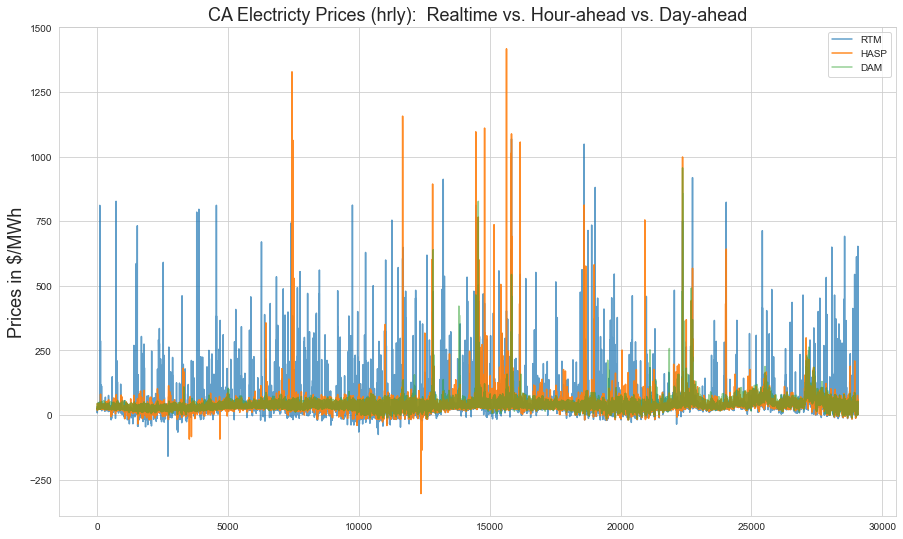

In [94]:
plt.figure(figsize=(15,9))
plt.title('CA Electricty Prices (hrly):  Realtime vs. Hour-ahead vs. Day-ahead', fontsize=18)

plt.plot(elec_prices_hrly.index,
         elec_prices_hrly.rtm_price_per_mwh,
         label = 'RTM', alpha=0.7)

plt.plot(elec_prices_hrly.index,
         elec_prices_hrly.hasp_price_per_mwh,
         label= 'HASP', alpha=0.9)

plt.plot(elec_prices_hrly.index,
         elec_prices_hrly.dam_price_per_mwh,
         label = 'DAM', alpha=0.5)

plt.ylabel('Prices in $/MWh', fontsize=18)
plt.legend()
# plt.savefig('../images/elec_prices_hrly.jpg', bbox_inches='tight')
;